In [1]:
import json
import matplotlib.pyplot as plt

In [35]:
with open("data_analysis.json",'r') as f:
    data = json.load(f)

## Short Ans Options

In [4]:
def plot_accuracies(x,y,xlabel,ylabel):
    ms=x
    vals=y
    plt.figure(figsize=(10, 6))
    plt.plot(ms, vals, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs {xlabel}')
    plt.grid(True)

    # Add text labels for each point
    for i, (m, val) in enumerate(zip(ms, vals)):
        plt.annotate(f'{val:.2f}%', (m, val), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

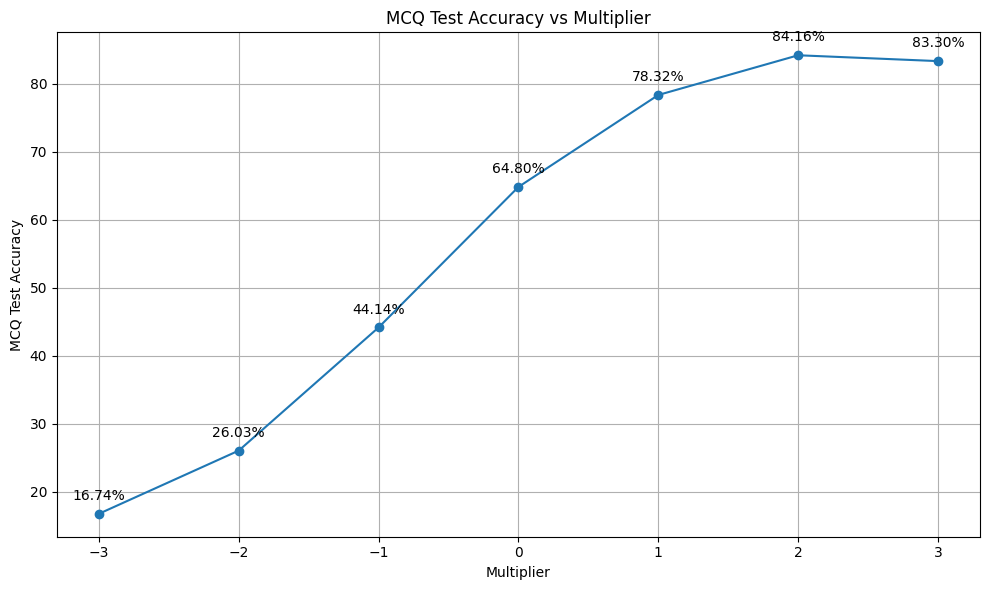

In [5]:
ms = [-3,-2,-1,0,1,2,3]
mstrings = ['m=0','m=+-1','m=+-2','m=+-3']
vals1 = [data['shortAnswerOptions']['mcqTestAccuracy'][mstrings[i]]['negative'] for i in range(3,-1,-1)]
vals2 = [data['shortAnswerOptions']['mcqTestAccuracy'][mstrings[i]]['positive'] for i in range(1,4,1)]

vals = vals1+vals2
plot_accuracies(ms,vals,"Multiplier","MCQ Test Accuracy")

In [46]:
def plot_open_ended(ms,faithfulness_list, reps_list, readEase_list, words_list, title,type='open_ended'): #type=if_eval
    x_values=ms
    
    plt.figure(figsize=(10, 6))  # Set the figure size

    if type=="open_ended":
        faithfulness_list,reps_list = [item*100 for item in faithfulness_list],[item*100 for item in reps_list]
        flabel = 'Faithfulness x100'
        rlabel = 'Reps x100'
        relabel = 'Read Ease'
        wlabel = 'Words'
    elif type=='if_eval':
        flabel = 'Strict, Prompt'
        rlabel = 'Strict, Inst'
        relabel = 'Loose, Prompt'
        wlabel = 'Loose, Inst'
    
    plt.plot(x_values, faithfulness_list, marker='o', color='blue', label=flabel)
    for i, value in enumerate(faithfulness_list):
        plt.text(x_values[i], value, f'{value:.2f}', color='blue', fontsize=9, ha='left')

    plt.plot(x_values, reps_list, marker='o', color='red', label=rlabel)
    for i, value in enumerate(reps_list):
        plt.text(x_values[i], value, f'{value:.2f}', color='red', fontsize=9, ha='left')

    plt.plot(x_values, readEase_list, marker='o', color='green', label=relabel)
    for i, value in enumerate(readEase_list):
        plt.text(x_values[i], value, f'{value:.2f}', color='green', fontsize=9, ha='left')

    plt.plot(x_values, words_list, marker='o', color='purple', label=wlabel)
    for i, value in enumerate(words_list):
        plt.text(x_values[i], value, f'{value:.2f}', color='purple', fontsize=9, ha='left')

    # Adding labels and title
    plt.xlabel('m Values')
    plt.ylabel('Scores')
    plt.title(title)
    
    # Adding a legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

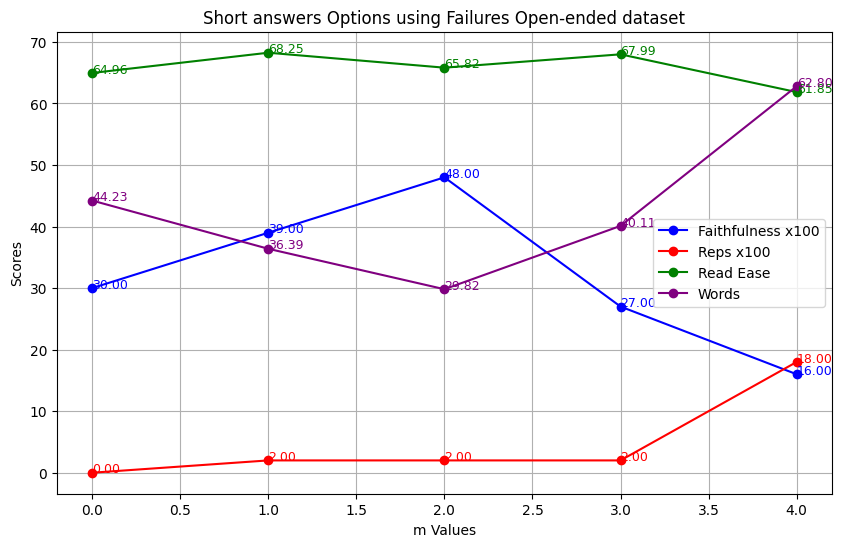

In [31]:
# Extracting lists from the dictionary
def extract_lists(heading,subheading,xlabels):
    if type(xlabels[0])==int:
        xlabels = [f"m={i}" for i in ms]
        
    faithfulness_list = [
        data[heading][subheading][i]["faith"]
        for i in xlabels
    ]

    reps_list = [
        data[heading][subheading][i]["reps"]
        for i in xlabels
    ]

    readEase_list = [
        data[heading][subheading][i]["readEase"]
        for i in xlabels
    ]

    words_list = [
        data[heading][subheading][i]["words"]
        for i in xlabels
    ]

    return faithfulness_list,reps_list,readEase_list,words_list

ms = [0,1,2,3,4]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("shortAnswerOptions","failuresOpenEndedgeval87%",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Short answers Options using Failures Open-ended dataset")

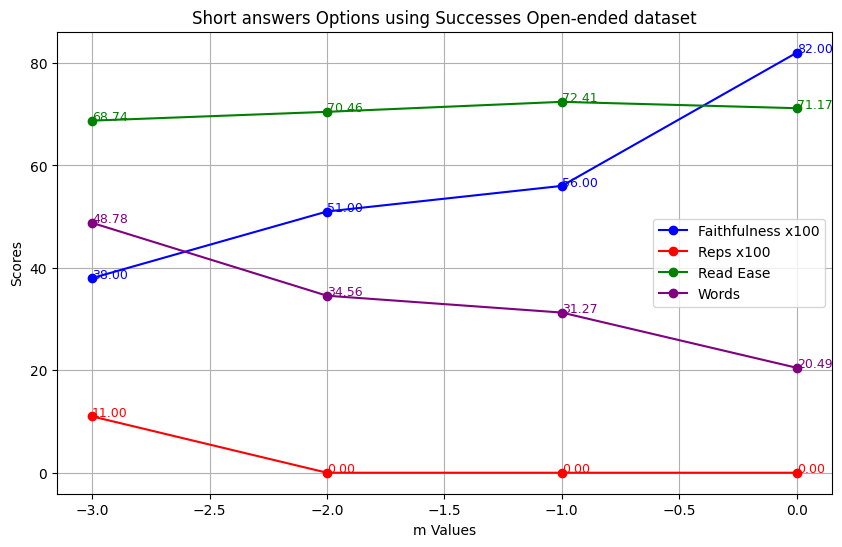

In [32]:
ms = [0,-1,-2,-3]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("shortAnswerOptions","successesOpenEnded",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Short answers Options using Successes Open-ended dataset")

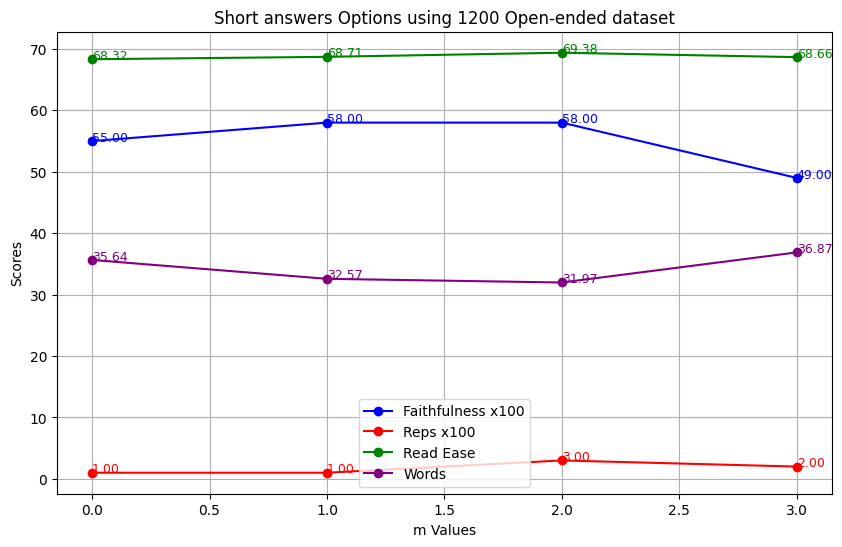

In [16]:
ms = [0,1,2,3]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("shortAnswerOptions","dataset1200",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Short answers Options using 1200 Open-ended dataset")

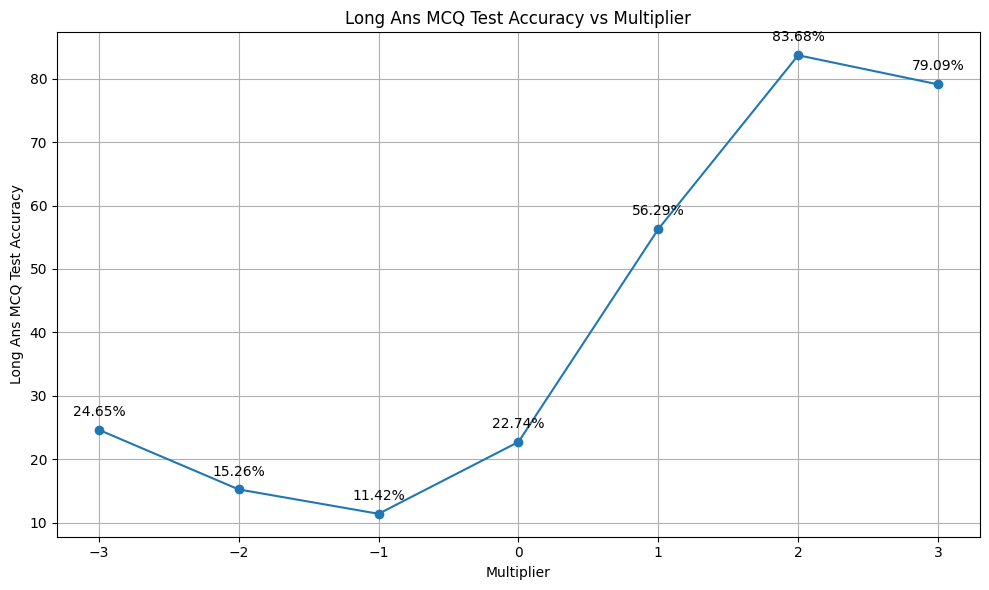

In [17]:
ms = [-3,-2,-1,0,1,2,3]
mstrings = ['m=0','m=+-1','m=+-2','m=+-3']
vals1 = [data['testLongAnswer']['mcqTestAccuracy'][mstrings[i]]['negative'] for i in range(3,-1,-1)]
vals2 = [data['testLongAnswer']['mcqTestAccuracy'][mstrings[i]]['positive'] for i in range(1,4,1)]

vals = vals1+vals2
plot_accuracies(ms,vals,"Multiplier","Long Ans MCQ Test Accuracy")

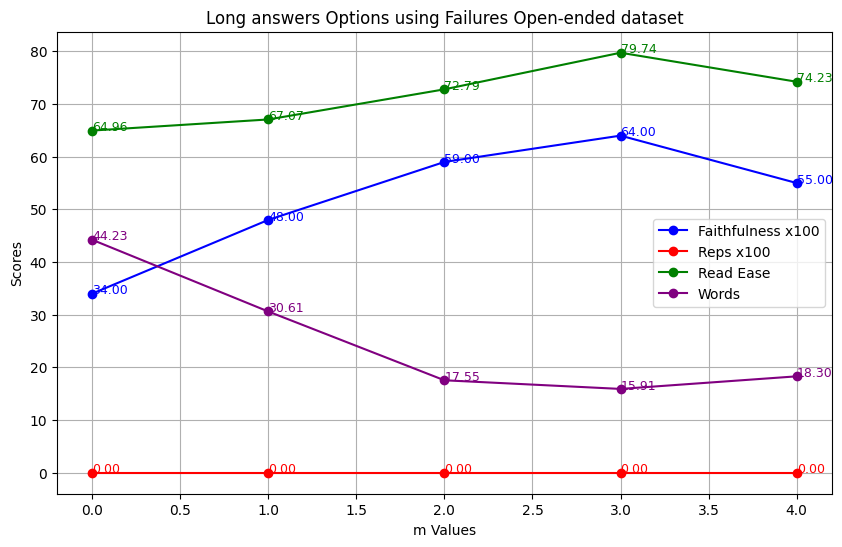

In [18]:
ms = [0,1,2,3,4]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("testLongAnswer","failuresOpenEndedgeval87%",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Long answers Options using Failures Open-ended dataset")

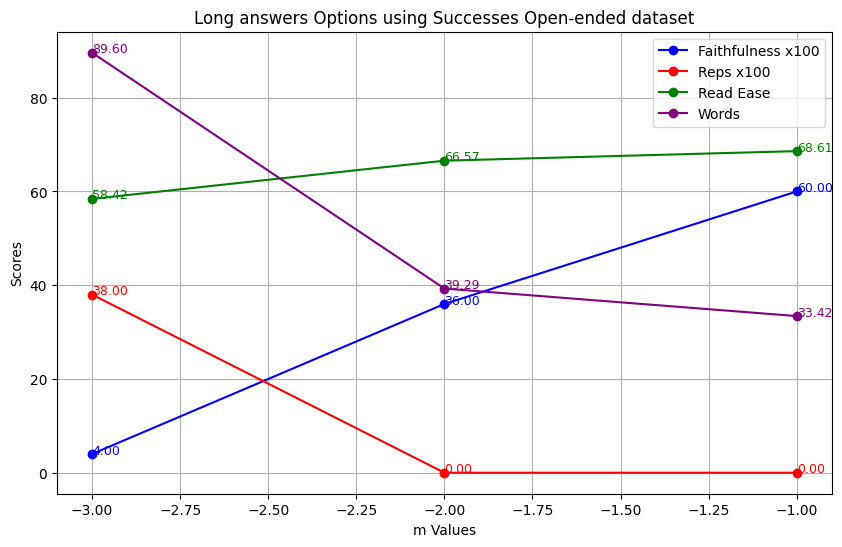

In [20]:
ms = [-1,-2,-3]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("testLongAnswer","successesOpenEnded",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Long answers Options using Successes Open-ended dataset")

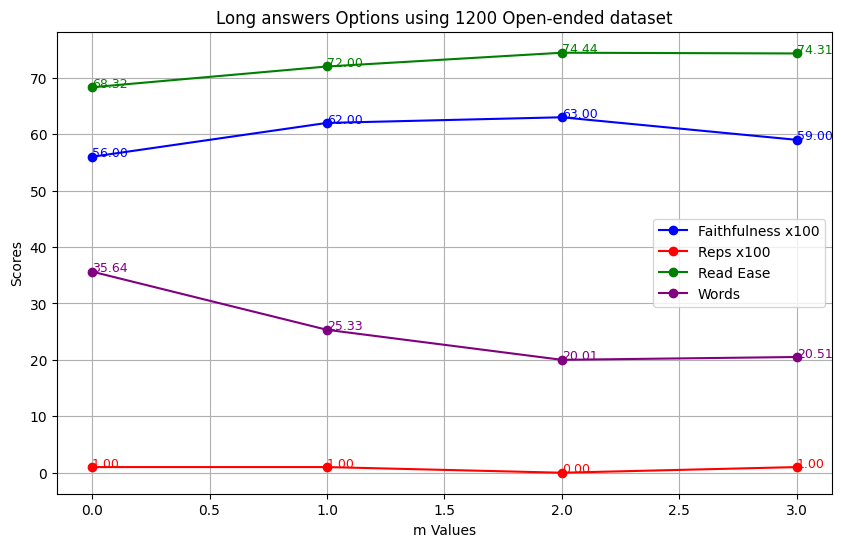

In [21]:
ms = [0,1,2,3]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("testLongAnswer","dataset1200",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Long answers Options using 1200 Open-ended dataset")

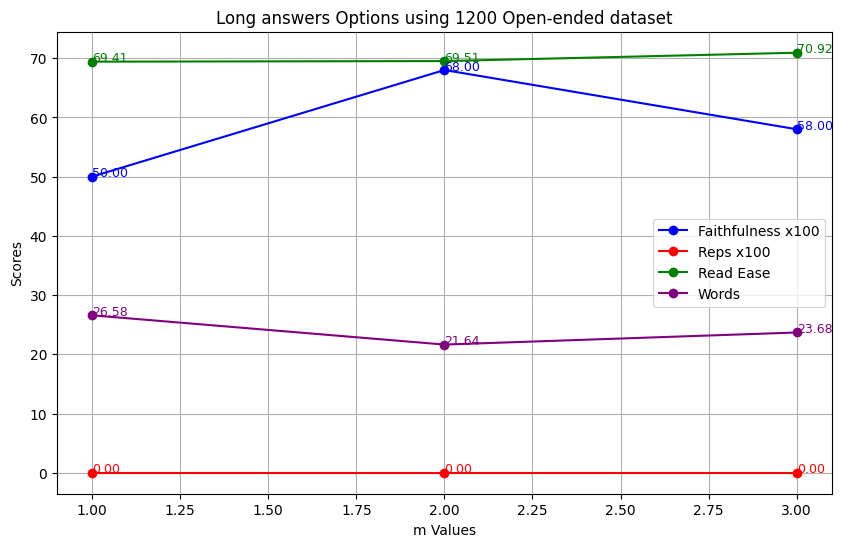

In [24]:
ms = [1,2,3]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("contrastiveSteering","failuresOpenEndedNoGeval",ms)

plot_open_ended(ms,faithfulness_list,reps_list,readEase_list,words_list,"Long answers Options using 1200 Open-ended dataset")

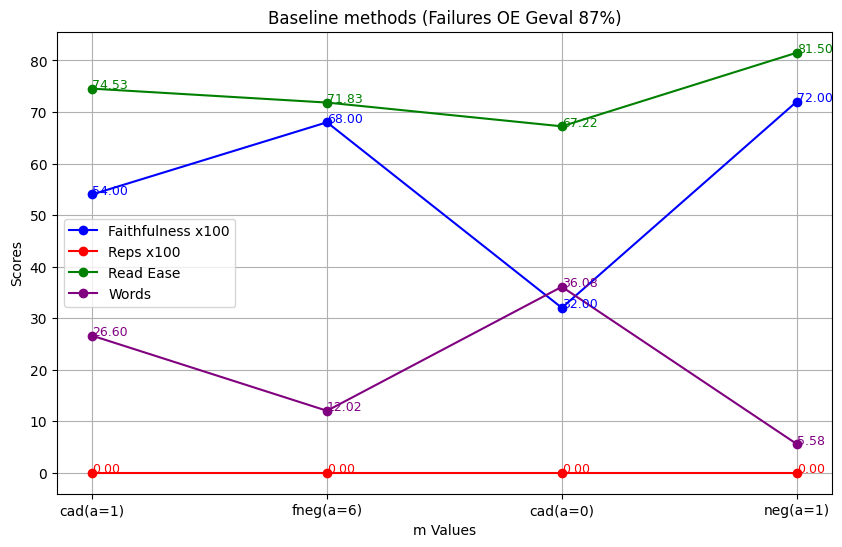

In [36]:
xlabels = ["cad(a=1)","fneg(a=6)","cad(a=0)","neg(a=1)"]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("baselineMethods","failuresOpenEndedgeval87%",xlabels)

plot_open_ended(xlabels,faithfulness_list,reps_list,readEase_list,words_list,"Baseline methods (Failures OE Geval 87%)")

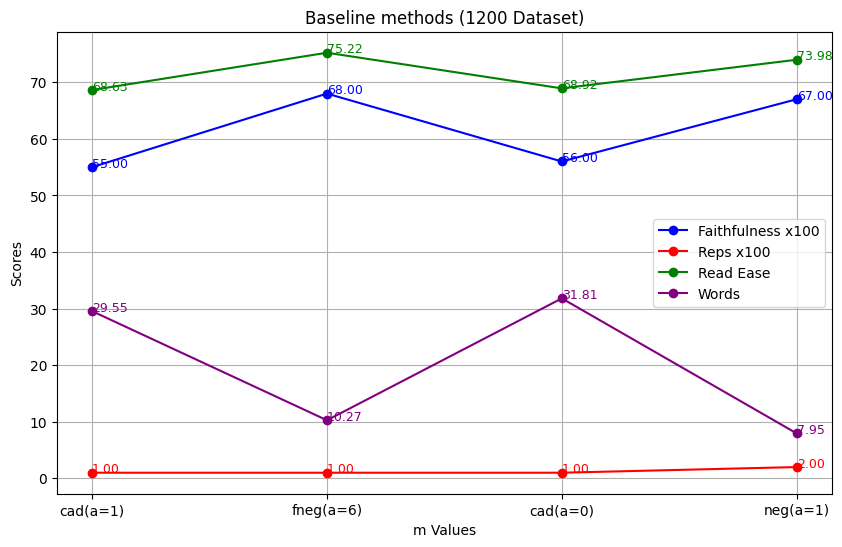

In [37]:
xlabels = ["cad(a=1)","fneg(a=6)","cad(a=0)","neg(a=1)"]
faithfulness_list,reps_list,readEase_list,words_list = extract_lists("baselineMethods","dataset1200",xlabels)

plot_open_ended(xlabels,faithfulness_list,reps_list,readEase_list,words_list,"Baseline methods (1200 Dataset)")

### Extract IFEval

In [42]:
def extract_lists_ifeval():
    xlabels = ["steering(II)(m=1)","steering(II)(m=2)","steering(II)(m=3)","regularCAD(α=1)","CAD(α=1)"]
    sp = [
        data["ifEval"][i]["strictPrompt"]
        for i in xlabels
    ]

    si = [
        data["ifEval"][i]["strictInst"]
        for i in xlabels
    ]

    lp = [
        data["ifEval"][i]["loosePrompt"]
        for i in xlabels
    ]

    li = [
        data["ifEval"][i]["looseInst"]
        for i in xlabels
    ]

    return sp,si,lp,li,xlabels

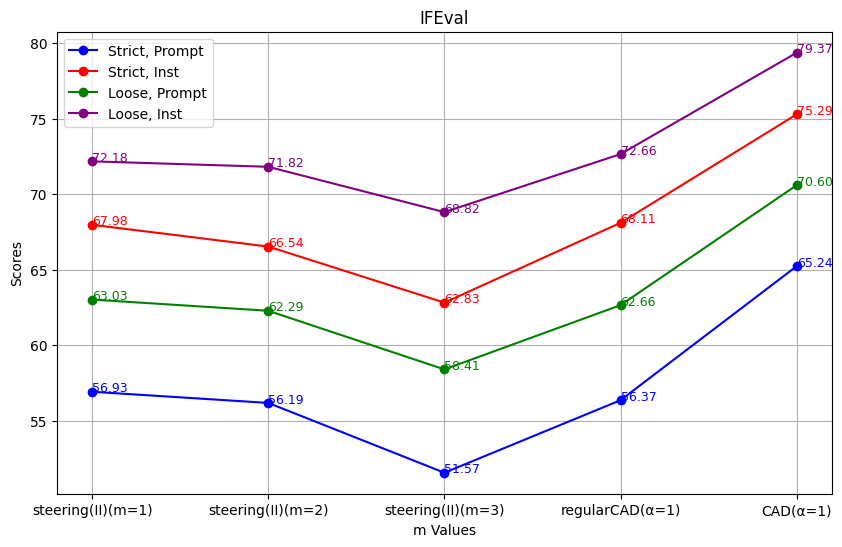

In [47]:
sp,si,lp,li,xlabels = extract_lists_ifeval()
plot_open_ended(xlabels,sp,si,lp,li,"IFEval",'if_eval')